<a href="https://colab.research.google.com/github/clairechiu1997/cvlab_2020_winter/blob/master/cvlab_2020_winter_project_A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!wget -nc 140.114.85.52:8000/pA1.csv
!wget -nc 140.114.85.52:8000/pA2.csv

File ‘pA1.csv’ already there; not retrieving.

File ‘pA2.csv’ already there; not retrieving.



In [0]:
#@title import data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm

import torch
from torch import nn
from torch.nn import functional as F
from torch.utils.data import Dataset, DataLoader

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

In [0]:
seed = 999
#let every random solution be the same
torch.manual_seed(seed)
torch.backends.cudnn.deterministic = True

In [0]:
class Data:
    def __init__(self, csv_path):
        super().__init__()
        self.anns = pd.read_csv(csv_path).to_dict('records')

    def __len__(self):
        return len(self.anns)

    def __getitem__(self, idx):
        ann = self.anns[idx]
        x = torch.tensor(ann['x'])
        y = torch.tensor(ann['y'])
        return x, y


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.a = nn.Parameter(torch.rand(1) * 0.001)
        self.b = nn.Parameter(torch.rand(1) * 0.001)
    
    def forward(self, xs):
        ps = self.a * xs + self.b
        return ps


data = Data('./pA1.csv')
loader = DataLoader(data, batch_size=1, shuffle=True)

device = 'cpu'
model = Net().to(device)
criterion = nn.L1Loss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-1)
#1e-1 = 1*10^-1

history = {
    'loss': [],
    'a': [],
    'b': []
}

for epoch in range(50):
    for xs, ys in iter(loader):
        xs = xs.to(device)
        ys = ys.to(device)

        optimizer.zero_grad()
        #set gradient to 0
        ps = model(xs)
        loss = criterion(ps, ys)
        #ps: predection; ys: ground truth
        loss.backward()
        optimizer.step()

        history['loss'].append(loss.detach().item())
        history['a'].append(model.a.item())
        history['b'].append(model.b.item())

print(model.a)
print(model.b)

Parameter containing:
tensor([5.2299], requires_grad=True)
Parameter containing:
tensor([3.9538], requires_grad=True)


In [0]:
a_array = np.linspace(-1, 6, 100)
b_array = np.linspace(-1, 6, 100)
loss_array = []

loader = DataLoader(data, batch_size=data.__len__(), shuffle=True)

for b in b_array:
    tmp = []
    for a in a_array:
        for xs, ys in iter(loader):
            ps = xs*a + b
            loss = criterion(ps, ys)
            tmp.append(loss.detach().item())
    loss_array.append(tmp)

a_array, b_array = np.meshgrid(a_array, b_array)
loss_array = np.asarray(loss_array)

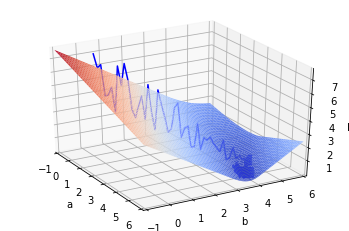

In [0]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(30 , -30)
ax.set_xlim3d(-1, 6)
ax.set_ylim3d(-1, 6)
ax.set_xlabel('a')
ax.set_ylabel('b')
ax.set_zlabel('loss')

ax.plot(history['a'], history['b'], history['loss'], c = 'b')
ax.plot_surface(a_array, b_array, loss_array, cmap=cm.coolwarm)

# Report
